https://github.com/tensorflow/tensorflow/blob/master/tensorflow/lite/g3doc/convert/python_api.md

https://www.tensorflow.org/lite/microcontrollers/build_convert

1. Train model using Tensorflow Lite
2. Convert to microcontroller version
3. Deploy on Raspberry Pi

Possible Datasets:
https://www.kaggle.com/inIT-OWL/high-storage-system-data-for-energy-optimization,
https://www.kaggle.com/tocha4/predictive-maintenance-basics-about-dataset,
https://www.kaggle.com/inIT-OWL/one-year-industrial-component-degradation, http://odds.cs.stonybrook.edu/

Technique:
https://thingsolver.com/time-series-anomaly-detection-using-a-variational-autoencoder-vae/

In [40]:
# conda install pandas matplotlib scikit-learn tensorflow-gpu
# pip install --user --upgrade tensorflow-probability

# https://www.tensorflow.org/install/gpu
# Note: TF 1.13 and above requires CUDA 10

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

from sklearn.preprocessing import StandardScaler

import tensorflow as tf
import tensorflow_probability as tfp

from timeit import default_timer as timer

In [5]:
df = pd.read_csv('./../data/versatileproductionsystem/Filling_ALL.module.csv', index_col=0)
df.head()

,I_BottleAtAirpipe,I_BottleClampClose,I_BottleClampOpen,I_BottleGateClosed,I_BottleReserveGateClosed,I_BottlesAvailable,I_BottleSlot1,I_BottleSlot2_H2O,I_BottleSlot3_Corn,I_BottleSlot5_CapOn,...,BottlesAvailable.AnalogValue.EURangeViolation,BottleSlot1.AnalogValue.EURangeViolation,BottleSlot2_H2O.AnalogValue.EURangeViolation,BottleSlot3_Corn.AnalogValue.EURangeViolation,BottleSlot5_CapOn.AnalogValue.EURangeViolation,BottleSlot6_CapCloser.AnalogValue.EURangeViolation,BottleSlot8_ModuleOut.AnalogValue.EURangeViolation,BottlesNotUsed.AnalogValue.EURangeViolation,UltraSonic_Corn.DistanceM.EURangeViolation,UltraSonic_H2O.DistanceM.EURangeViolation
Timestamp,,,,,,,,,,,,,,,,,,,,,
1529500027127,0,0,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1529500027227,0,0,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1529500027327,0,0,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1529500027428,0,0,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1529500027528,0,0,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10529 entries, 1529500027127 to 1529501082130
Data columns (total 84 columns):
I_BottleAtAirpipe                                     10529 non-null int64
I_BottleClampClose                                    10529 non-null int64
I_BottleClampOpen                                     10529 non-null int64
I_BottleGateClosed                                    10529 non-null int64
I_BottleReserveGateClosed                             10529 non-null int64
I_BottlesAvailable                                    10529 non-null int64
I_BottleSlot1                                         10529 non-null int64
I_BottleSlot2_H2O                                     10529 non-null int64
I_BottleSlot3_Corn                                    10529 non-null int64
I_BottleSlot5_CapOn                                   10529 non-null int64
I_BottleSlot6_CapScrewer                              10529 non-null int64
I_BottleSlot8_Output                          

In [7]:
df.describe()

,I_BottleAtAirpipe,I_BottleClampClose,I_BottleClampOpen,I_BottleGateClosed,I_BottleReserveGateClosed,I_BottlesAvailable,I_BottleSlot1,I_BottleSlot2_H2O,I_BottleSlot3_Corn,I_BottleSlot5_CapOn,...,BottlesAvailable.AnalogValue.EURangeViolation,BottleSlot1.AnalogValue.EURangeViolation,BottleSlot2_H2O.AnalogValue.EURangeViolation,BottleSlot3_Corn.AnalogValue.EURangeViolation,BottleSlot5_CapOn.AnalogValue.EURangeViolation,BottleSlot6_CapCloser.AnalogValue.EURangeViolation,BottleSlot8_ModuleOut.AnalogValue.EURangeViolation,BottlesNotUsed.AnalogValue.EURangeViolation,UltraSonic_Corn.DistanceM.EURangeViolation,UltraSonic_H2O.DistanceM.EURangeViolation
count,10529.000000,10529.000000,10529.000000,10529.000000,10529.000000,10529.000000,10529.000000,10529.000000,10529.000000,10529.000000,...,10529.0,10529.0,10529.0,10529.0,10529.0,10529.0,10529.0,10529.0,10529.0,10529.0
mean,0.011207,0.254155,0.716497,0.973597,0.994871,0.973977,0.004274,0.688100,0.692089,0.712603,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.105274,0.435406,0.450720,0.160339,0.071434,0.159212,0.065238,0.463291,0.461652,0.452570,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# filter out low variance columns and plot them
high_variance_cols = df.columns[df.std() > 0.25]

high_variance_cols

Index(['I_BottleClampClose', 'I_BottleClampOpen', 'I_BottleSlot2_H2O',
       'I_BottleSlot3_Corn', 'I_BottleSlot5_CapOn', 'I_BottleSlot6_CapScrewer',
       'I_BottlesReserveAvailable', 'I_CapGrabberUp', 'I_CapScrewer_Up',
       'I_CapScrewerClosePos', 'I_CapScrewerGrabClosed', 'I_CapScrewerOpenPos',
       'I_LinAxisCapInGrabber', 'I_LinAxisDown', 'I_LinAxisEmptyGrabber',
       'I_LinAxisUp', 'I_Pump_Down', 'I_RotaryTablePosReached',
       'I_UltrasonicCorn', 'I_UltrasonicCorn_Distance',
       'I_UltrasonicH2O_Distance', 'O_BottleClampClose',
       'O_CapGrabberOpenClose', 'O_CapGrabberUpDown', 'O_CapScrewDown',
       'O_CapScrewerGrabberOpenClose', 'O_CloseCap', 'O_ConveyorCapsForward',
       'O_LinAxisUpDown', 'O_PumpUpDown', 'O_RotaryTable',
       'O_ValvePumpCloseOpen', 'PendingOrder', 'Rotating', 'State',
       'BottlesAvailable', 'BottleSlot1', 'BottleSlot2_H2O',
       'BottleSlot3_Corn', 'BottleSlot5_CapOn', 'BottleSlot6_CapCloser',
       'BottleSlot8_ModuleOut', 'B

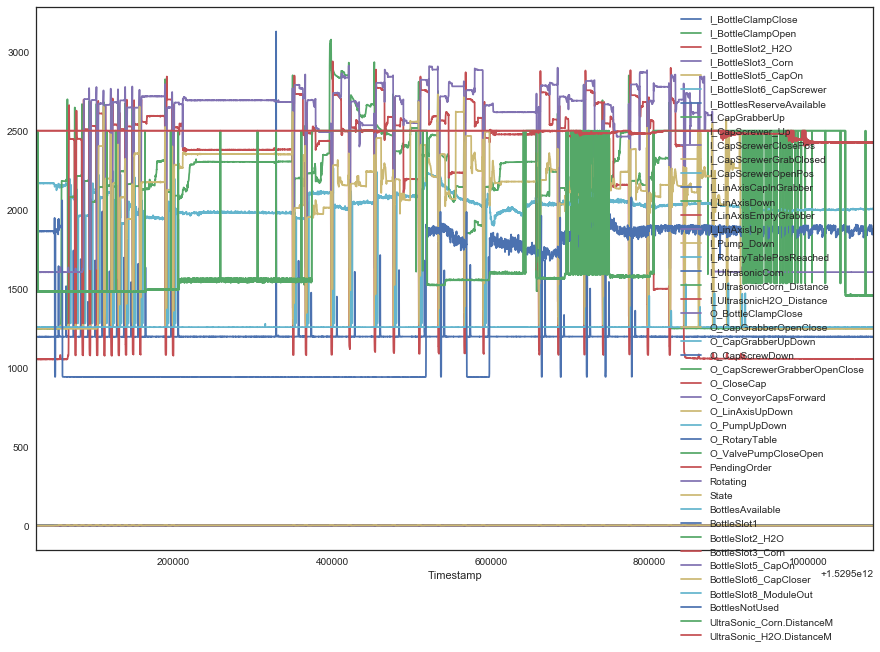

In [74]:
fig, ax = plt.subplots(figsize=(15, 10))
df[high_variance_cols].plot(ax=ax)
plt.show()

In [10]:
# There are still columns with low mean, let's plot them

df1 = df[high_variance_cols]
low_mean_cols = df1.columns[df1.mean() < 5]
low_mean_cols

Index(['I_BottleClampClose', 'I_BottleClampOpen', 'I_BottleSlot2_H2O',
       'I_BottleSlot3_Corn', 'I_BottleSlot5_CapOn', 'I_BottleSlot6_CapScrewer',
       'I_BottlesReserveAvailable', 'I_CapGrabberUp', 'I_CapScrewer_Up',
       'I_CapScrewerClosePos', 'I_CapScrewerGrabClosed', 'I_CapScrewerOpenPos',
       'I_LinAxisCapInGrabber', 'I_LinAxisDown', 'I_LinAxisEmptyGrabber',
       'I_LinAxisUp', 'I_Pump_Down', 'I_RotaryTablePosReached',
       'I_UltrasonicCorn', 'O_BottleClampClose', 'O_CapGrabberOpenClose',
       'O_CapGrabberUpDown', 'O_CapScrewDown', 'O_CapScrewerGrabberOpenClose',
       'O_CloseCap', 'O_ConveyorCapsForward', 'O_LinAxisUpDown',
       'O_PumpUpDown', 'O_RotaryTable', 'O_ValvePumpCloseOpen', 'PendingOrder',
       'Rotating', 'State'],
      dtype='object')

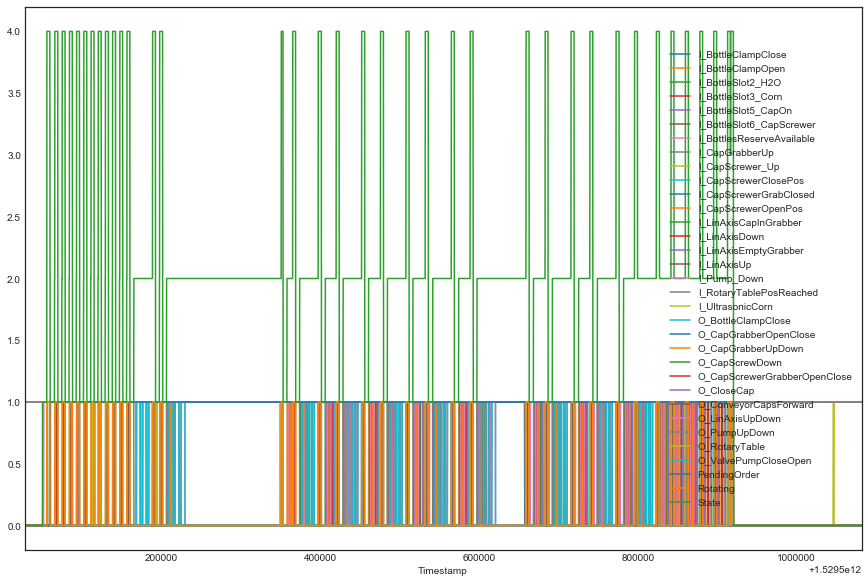

In [11]:
fig, ax = plt.subplots(figsize=(15, 10))
df1[low_mean_cols].plot(ax=ax)
plt.show()

In [12]:
# these are the high mean columns
high_mean_cols = set(df1.columns).difference(low_mean_cols)
high_mean_cols

{'BottleSlot1',
 'BottleSlot2_H2O',
 'BottleSlot3_Corn',
 'BottleSlot5_CapOn',
 'BottleSlot6_CapCloser',
 'BottleSlot8_ModuleOut',
 'BottlesAvailable',
 'BottlesNotUsed',
 'I_UltrasonicCorn_Distance',
 'I_UltrasonicH2O_Distance',
 'UltraSonic_Corn.DistanceM',
 'UltraSonic_H2O.DistanceM'}

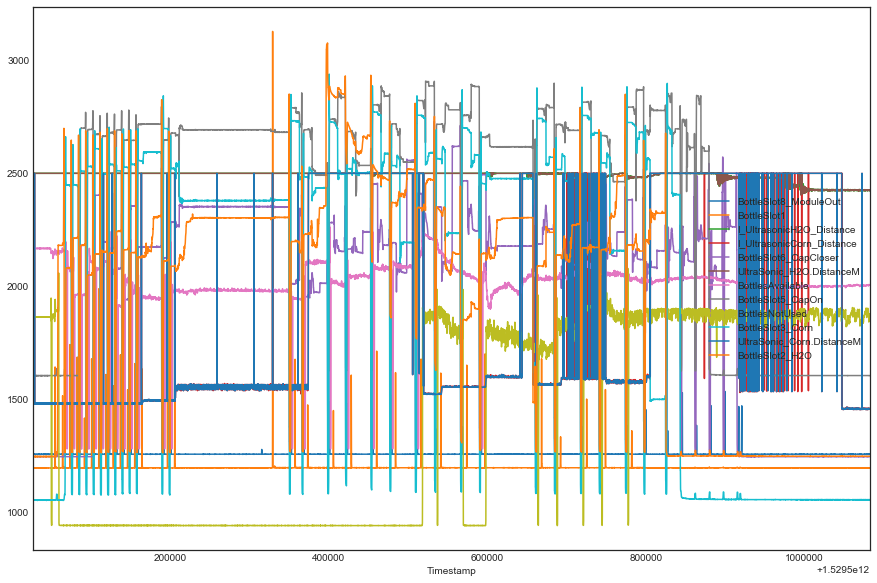

In [13]:
fig, ax = plt.subplots(figsize=(15, 10))
df1[high_mean_cols].plot(ax=ax)
plt.show()

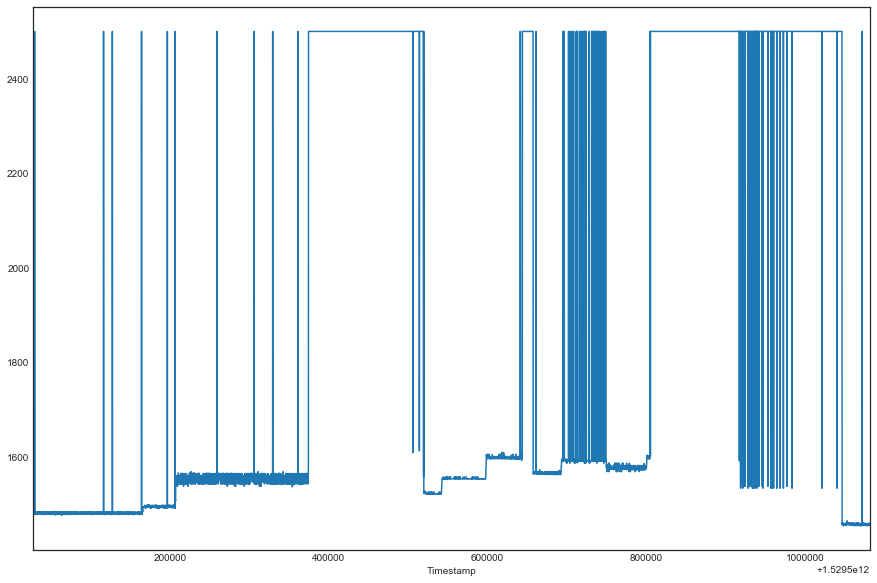

In [14]:
# pick one of the variables to do anomaly detection

fig, ax = plt.subplots(figsize=(15, 10))
df1['UltraSonic_Corn.DistanceM'].plot(ax=ax)
plt.show()

C:\Users\issohl\.conda\envs\diec\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\issohl\.conda\envs\diec\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


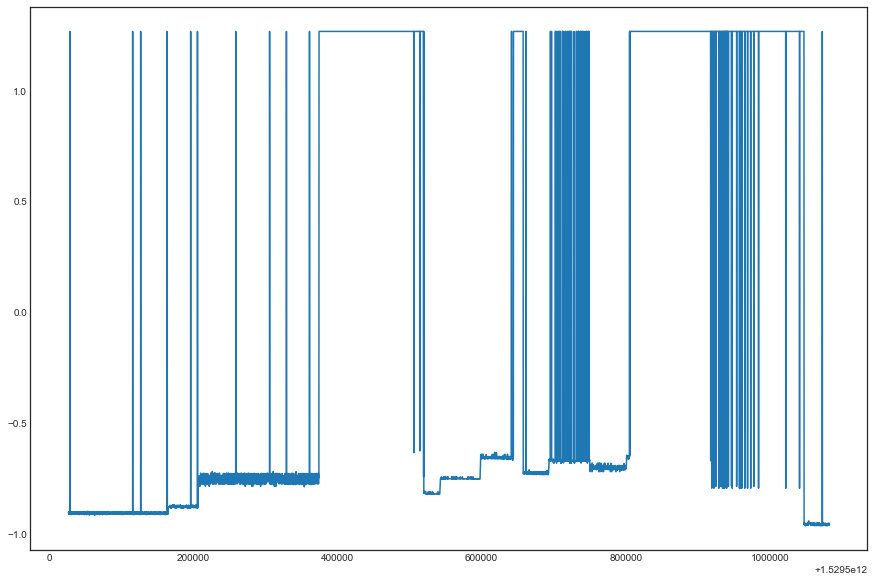

In [15]:
# scale and plot again. Scaling will 
scaler = StandardScaler()
scaled_df1 = scaler.fit_transform(df1)

fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(df1.index, scaled_df1[:, df1.columns == 'UltraSonic_Corn.DistanceM'])
plt.show()

In [38]:
class VAE(object):
    """https://thingsolver.com/time-series-anomaly-detection-using-a-variational-autoencoder-vae/
    """
    def __init__(self, target, z_dim, n_dim, n_hidden_layers):
        tf.reset_default_graph()
        
        def make_prior(code_size):
            loc = tf.zeros(code_size)
            scale = tf.ones(code_size)
            return tfp.distributions.MultivariateNormalDiag(loc, scale)
        
        self.z_dim = z_dim
        self.n_dim = n_dim
        self.target = target
        self.dense_size = n_hidden_layers
        
        self.input = tf.placeholder(dtype=tf.float32, shape=[None, n_dim], name='Target_data')
        self.batch_size = tf.placeholder(dtype=tf.int64, name='init_batch_size')
        
        # loop rows indefinitely, create batches
        dataset = tf.data.Dataset.from_tensor_slices(self.input)\
            .repeat() \
            .batch(self.batch_size)
        self.ite = dataset.make_initializable_iterator()
        self.x = self.ite.get_next()
        
        # encoder
        self.prior = make_prior(code_size=self.z_dim)
        x = tf.contrib.layers.flatten(self.x)
        x = tf.layers.dense(x, self.dense_size, tf.nn.relu)
        x = tf.layers.dense(x, self.dense_size, tf.nn.relu)
        loc = tf.layers.dense(x, self.z_dim)
        scale = tf.layers.dense(x, self.z_dim, tf.nn.softplus)
        self.posterior = tfp.distributions.MultivariateNormalDiag(loc, scale)
        self.code = self.posterior.sample()
        
        # decoder
        x = self.code
        x = tf.layers.dense(x, self.dense_size, tf.nn.relu)
        x = tf.layers.dense(x, self.dense_size, tf.nn.relu)
        loc = tf.layers.dense(x, self.n_dim)
        scale = tf.layers.dense(x, self.n_dim, tf.nn.softplus)
        self.decoder = tfp.distributions.MultivariateNormalDiag(loc, scale)

        # loss
        self.likelihood = self.decoder.log_prob(self.x)
        self.divergence = tfp.distributions.kl_divergence(self.posterior, self.prior)
        self.elbo = tf.reduce_mean(self.likelihood - self.divergence)
        self.cost = -self.elbo
        
        self.saver = tf.train.Saver()
        self.sess = tf.Session()
        
    def fit(self, Xs, learning_rate=0.001, num_epochs=10, batch_size=200, verbose=True):
        self.optimize = tf.train.AdamOptimizer(learning_rate).minimize(self.cost)

        batches_per_epoch = len(Xs[0]) // batch_size
        print('\nTraining anomaly detector/dimensionality reduction VAE for target\n', self.target)
        print('f\nBatches per epoch: {batches_per_epoch}')
        start = timer()
        
        self.sess.run(tf.global_variables_initializer())
        
        for epoch in range(num_epochs):
            train_error = 0
            self.sess.run(
                self.ite.initializer,
                feed_dict={self.input: Xs, self.batch_size: batch_size})
            
            for step in range(batches_per_epoch):
                _, loss = self.sess.run([self.optimize, self.cost])
                train_error += loss
                if step == (batches_per_epoch - 1):
                    mean_loss = train_error / batches_per_epoch
                    
            if verbose:
                print(f'Epoch {epoch+1} Loss {mean_loss:.5f}')
            
            if train_error == np.nan:
                return False

        end = timer()
        print(f'Training time: {end-start:.2f}')        
        return True

In [39]:
y = scaled_df1[:, df1.columns == 'UltraSonic_Corn.DistanceM'].flatten()
window_size = 200

model = VAE(target=y, z_dim=50, n_dim=window_size, n_hidden_layers=100)

InternalError: cudaGetDevice() failed. Status: CUDA driver version is insufficient for CUDA runtime version